In [20]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [50]:
pdata = pd.read_csv('data-final.csv', delimiter='\t')
#pdata = pd.read_csv('data-small.csv')
pdata_len = 20000

# Removing unnecessary columns
keep_columns = []
for x in range (0, 50):
    keep_columns.append(x)
keep_columns.append(106)
keep_columns.append(107)
columns_to_keep = [x for x in range(pdata.shape[1]) if x in keep_columns]
pdata = pdata.iloc[:, columns_to_keep]

# Add columns for averages [EXT_Avg, EST_Avg, AGR_Avg, CSN_Avg, OPN_Avg]
pdata["EXT_Avg"] = 0
pdata["EST_Avg"] = 0
pdata["AGR_Avg"] = 0
pdata["CSN_Avg"] = 0
pdata["OPN_Avg"] = 0

print (pdata.head(20))



    EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  OPN8  \
0    4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   3.0   
1    3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   2.0   
2    2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   3.0   
3    2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   4.0   
4    3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   3.0   
5    3.0   3.0   4.0   2.0   4.0   2.0   2.0   3.0   3.0    4.0  ...   4.0   
6    4.0   3.0   4.0   3.0   3.0   3.0   5.0   3.0   4.0    3.0  ...   5.0   
7    3.0   1.0   5.0   2.0   5.0   2.0   5.0   2.0   3.0    2.0  ...   3.0   
8    2.0   2.0   3.0   3.0   4.0   2.0   2.0   2.0   4.0    4.0  ...   2.0   
9    1.0   5.0   3.0   5.0   2.0   3.0   2.0   4.0   5.0    4.0  ...   3.0   
10   3.0   3.0   2.0   3.0   3.0   2.0   4.0   3.0   3.0    5.0  ...   5.0   
11   3.0   1.0   5.0   3.0   5.0   1.0   5.0   5.0   5.0    3.0 

In [51]:
# Create a dataframe to keep track of country averages for each of the personality traits
coun_d = pd.DataFrame()
coun_d['Country'] = ""
coun_d = coun_d.set_index('Country')
coun_d["NumberOfEntries"] = 0
coun_d["EXT_Sum"] = 0
coun_d["EST_Sum"] = 0
coun_d["AGR_Sum"] = 0
coun_d["CSN_Sum"] = 0
coun_d["OPN_Sum"] = 0

coun_d["EXT_Var"] = 0
coun_d["EST_Var"] = 0
coun_d["AGR_Var"] = 0
coun_d["CSN_Var"] = 0
coun_d["OPN_Var"] = 0

# For each row, we need to compute the mean for each of the big 5 personalities
i = 0
j = 0
country_index = {}
while i < pdata_len:
    # Removing unviable entries
    if pdata.iloc[i, 50] != 1 or pdata.iloc[i, 51] == 'NONE':
        pdata = pdata.drop(pdata.index[i])
        print(i, " dropped")
    # Updating the mean for each entry in the original dataframe
    else:
        pdata.iloc[i, 52]= float(statistics.mean(pdata.iloc[i, 0:10])) # Ext_Avg
        pdata.iloc[i, 53]= float(statistics.mean(pdata.iloc[i, 10:20]))# Est_Avg
        pdata.iloc[i, 54]= float(statistics.mean(pdata.iloc[i, 20:30]))# Agr_Avg
        pdata.iloc[i, 55]= float(statistics.mean(pdata.iloc[i, 30:40]))# CSN_Avg
        pdata.iloc[i, 56]= float(statistics.mean(pdata.iloc[i, 40:50]))# Opn_Avg
        
        # Adding data to coun_d dataframe based on country (if country does not already exist in df)
        temp_country = pdata.iloc[i, 51]
        if (temp_country not in country_index and temp_country != 'None'):
            temp_row = pd.DataFrame({"Country":[pdata.iloc[i, 51]], "NumberOfEntries": [0], 'EXT_Sum': [0], 'EST_Sum':[0],
                        'AGR_Sum':[0], 'CSN_Sum':[0], 'OPN_Sum': [0], 'EXT_Var':[0],'EST_Var':[0],
                        'AGR_Var':[0], 'CSN_Var':[0], 'OPN_Var':[0]})
            coun_d = pd.concat([coun_d, temp_row], ignore_index = True)
            country_index[temp_country] = j
            j += 1

        # Adding data to the coun_d dataframe based on mean data
        coun_d.at[country_index[temp_country], "NumberOfEntries"] += 1
        coun_d.at[country_index[temp_country], "EXT_Sum"] += float(pdata.iloc[i, 52])
        coun_d.at[country_index[temp_country], "EST_Sum"] += float(pdata.iloc[i, 53])
        coun_d.at[country_index[temp_country], "AGR_Sum"] += float(pdata.iloc[i, 54])
        coun_d.at[country_index[temp_country], "CSN_Sum"] += float(pdata.iloc[i, 55])
        coun_d.at[country_index[temp_country], "OPN_Sum"] += float(pdata.iloc[i, 56])
        print(i, " processed")
        

    i += 1
print(country_index)
print(coun_d)

0  processed
1  processed
2  processed
3  processed
4  dropped
5  processed
6  processed
7  processed
8  processed
9  processed
10  processed
11  processed
12  processed
13  processed
14  processed
15  processed
16  dropped
17  processed
18  processed
19  processed
20  processed
21  processed
22  processed
23  processed
24  dropped
25  processed
26  processed
27  processed
28  processed
29  dropped
30  processed
31  processed
32  processed
33  processed
34  processed
35  dropped
36  dropped
37  processed
38  processed
39  dropped
40  processed
41  processed
42  dropped
43  processed
44  processed
45  processed
46  processed
47  processed
48  processed
49  dropped
50  dropped
51  dropped
52  processed
53  processed
54  processed
55  processed
56  processed
57  processed
58  processed
59  dropped
60  dropped
61  dropped
62  processed
63  dropped
64  processed
65  dropped
66  processed
67  dropped
68  processed
69  dropped
70  dropped
71  processed
72  dropped
73  dropped
74  dropped
75  

582  dropped
583  processed
584  dropped
585  dropped
586  processed
587  processed
588  processed
589  processed
590  processed
591  processed
592  processed
593  dropped
594  processed
595  processed
596  processed
597  dropped
598  processed
599  dropped
600  processed
601  dropped
602  processed
603  dropped
604  processed
605  processed
606  processed
607  processed
608  processed
609  dropped
610  dropped
611  dropped
612  processed
613  dropped
614  processed
615  dropped
616  processed
617  processed
618  processed
619  dropped
620  processed
621  processed
622  processed
623  processed
624  processed
625  processed
626  processed
627  processed
628  processed
629  processed
630  processed
631  processed
632  dropped
633  dropped
634  processed
635  processed
636  processed
637  processed
638  processed
639  dropped
640  processed
641  dropped
642  dropped
643  processed
644  processed
645  dropped
646  processed
647  processed
648  processed
649  processed
650  dropped
651  dr

1135  dropped
1136  processed
1137  dropped
1138  dropped
1139  processed
1140  processed
1141  dropped
1142  processed
1143  processed
1144  processed
1145  dropped
1146  processed
1147  processed
1148  processed
1149  processed
1150  processed
1151  processed
1152  processed
1153  processed
1154  processed
1155  dropped
1156  processed
1157  processed
1158  processed
1159  processed
1160  processed
1161  dropped
1162  processed
1163  processed
1164  processed
1165  dropped
1166  processed
1167  processed
1168  processed
1169  processed
1170  processed
1171  processed
1172  processed
1173  processed
1174  processed
1175  dropped
1176  dropped
1177  dropped
1178  processed
1179  dropped
1180  dropped
1181  dropped
1182  processed
1183  processed
1184  processed
1185  processed
1186  processed
1187  processed
1188  processed
1189  processed
1190  processed
1191  processed
1192  processed
1193  dropped
1194  dropped
1195  dropped
1196  processed
1197  processed
1198  processed
1199  proc

1679  dropped
1680  dropped
1681  dropped
1682  processed
1683  dropped
1684  dropped
1685  dropped
1686  dropped
1687  dropped
1688  dropped
1689  processed
1690  dropped
1691  dropped
1692  dropped
1693  dropped
1694  processed
1695  dropped
1696  processed
1697  dropped
1698  dropped
1699  dropped
1700  dropped
1701  dropped
1702  dropped
1703  dropped
1704  dropped
1705  dropped
1706  dropped
1707  processed
1708  dropped
1709  processed
1710  dropped
1711  processed
1712  processed
1713  processed
1714  dropped
1715  dropped
1716  processed
1717  processed
1718  processed
1719  processed
1720  dropped
1721  dropped
1722  processed
1723  processed
1724  dropped
1725  dropped
1726  processed
1727  processed
1728  dropped
1729  processed
1730  dropped
1731  processed
1732  processed
1733  processed
1734  processed
1735  processed
1736  processed
1737  processed
1738  processed
1739  dropped
1740  processed
1741  dropped
1742  dropped
1743  processed
1744  dropped
1745  processed
1746

2214  processed
2215  processed
2216  processed
2217  processed
2218  processed
2219  processed
2220  processed
2221  processed
2222  processed
2223  processed
2224  processed
2225  processed
2226  processed
2227  processed
2228  processed
2229  processed
2230  processed
2231  processed
2232  processed
2233  dropped
2234  processed
2235  processed
2236  processed
2237  processed
2238  processed
2239  processed
2240  dropped
2241  processed
2242  processed
2243  processed
2244  processed
2245  processed
2246  processed
2247  processed
2248  processed
2249  processed
2250  processed
2251  processed
2252  processed
2253  processed
2254  processed
2255  processed
2256  processed
2257  processed
2258  processed
2259  processed
2260  processed
2261  processed
2262  processed
2263  processed
2264  dropped
2265  processed
2266  processed
2267  dropped
2268  processed
2269  processed
2270  processed
2271  processed
2272  processed
2273  dropped
2274  processed
2275  processed
2276  processed
22

2746  dropped
2747  processed
2748  dropped
2749  processed
2750  processed
2751  processed
2752  processed
2753  processed
2754  processed
2755  processed
2756  processed
2757  processed
2758  processed
2759  processed
2760  processed
2761  dropped
2762  processed
2763  processed
2764  dropped
2765  processed
2766  processed
2767  processed
2768  processed
2769  processed
2770  processed
2771  dropped
2772  processed
2773  processed
2774  processed
2775  processed
2776  dropped
2777  processed
2778  dropped
2779  processed
2780  processed
2781  dropped
2782  processed
2783  processed
2784  processed
2785  dropped
2786  processed
2787  processed
2788  processed
2789  processed
2790  processed
2791  processed
2792  dropped
2793  dropped
2794  processed
2795  processed
2796  processed
2797  processed
2798  processed
2799  processed
2800  processed
2801  processed
2802  processed
2803  processed
2804  processed
2805  processed
2806  processed
2807  processed
2808  processed
2809  dropped


3283  dropped
3284  processed
3285  processed
3286  processed
3287  processed
3288  processed
3289  processed
3290  processed
3291  processed
3292  processed
3293  processed
3294  processed
3295  processed
3296  processed
3297  dropped
3298  processed
3299  processed
3300  processed
3301  dropped
3302  processed
3303  processed
3304  processed
3305  processed
3306  processed
3307  processed
3308  dropped
3309  processed
3310  processed
3311  processed
3312  processed
3313  processed
3314  processed
3315  dropped
3316  processed
3317  dropped
3318  processed
3319  processed
3320  processed
3321  processed
3322  processed
3323  processed
3324  processed
3325  processed
3326  dropped
3327  dropped
3328  processed
3329  processed
3330  processed
3331  processed
3332  processed
3333  processed
3334  dropped
3335  processed
3336  processed
3337  processed
3338  processed
3339  processed
3340  processed
3341  processed
3342  processed
3343  dropped
3344  processed
3345  processed
3346  proces

3809  dropped
3810  processed
3811  processed
3812  dropped
3813  processed
3814  processed
3815  processed
3816  processed
3817  dropped
3818  processed
3819  processed
3820  processed
3821  processed
3822  processed
3823  processed
3824  processed
3825  processed
3826  processed
3827  dropped
3828  processed
3829  dropped
3830  dropped
3831  processed
3832  processed
3833  processed
3834  processed
3835  processed
3836  dropped
3837  processed
3838  processed
3839  dropped
3840  processed
3841  processed
3842  dropped
3843  processed
3844  processed
3845  processed
3846  processed
3847  dropped
3848  processed
3849  processed
3850  processed
3851  dropped
3852  processed
3853  dropped
3854  processed
3855  processed
3856  processed
3857  processed
3858  dropped
3859  dropped
3860  processed
3861  processed
3862  processed
3863  processed
3864  dropped
3865  dropped
3866  processed
3867  dropped
3868  processed
3869  dropped
3870  processed
3871  processed
3872  processed
3873  proces

4339  dropped
4340  processed
4341  processed
4342  dropped
4343  dropped
4344  processed
4345  processed
4346  processed
4347  dropped
4348  processed
4349  processed
4350  dropped
4351  processed
4352  processed
4353  processed
4354  processed
4355  dropped
4356  dropped
4357  processed
4358  processed
4359  dropped
4360  processed
4361  processed
4362  processed
4363  processed
4364  processed
4365  dropped
4366  processed
4367  dropped
4368  processed
4369  processed
4370  processed
4371  processed
4372  processed
4373  processed
4374  processed
4375  processed
4376  dropped
4377  dropped
4378  processed
4379  dropped
4380  dropped
4381  dropped
4382  processed
4383  dropped
4384  processed
4385  processed
4386  dropped
4387  dropped
4388  dropped
4389  dropped
4390  dropped
4391  dropped
4392  processed
4393  processed
4394  dropped
4395  dropped
4396  dropped
4397  dropped
4398  dropped
4399  dropped
4400  processed
4401  dropped
4402  processed
4403  dropped
4404  processed
4405

4880  dropped
4881  processed
4882  dropped
4883  processed
4884  processed
4885  dropped
4886  dropped
4887  dropped
4888  processed
4889  dropped
4890  dropped
4891  processed
4892  dropped
4893  dropped
4894  dropped
4895  processed
4896  processed
4897  processed
4898  processed
4899  processed
4900  processed
4901  processed
4902  dropped
4903  processed
4904  processed
4905  processed
4906  processed
4907  dropped
4908  processed
4909  processed
4910  dropped
4911  dropped
4912  processed
4913  dropped
4914  processed
4915  dropped
4916  dropped
4917  processed
4918  dropped
4919  dropped
4920  processed
4921  dropped
4922  dropped
4923  dropped
4924  dropped
4925  dropped
4926  dropped
4927  processed
4928  processed
4929  processed
4930  dropped
4931  processed
4932  processed
4933  processed
4934  processed
4935  processed
4936  processed
4937  processed
4938  processed
4939  processed
4940  processed
4941  processed
4942  processed
4943  processed
4944  processed
4945  proces

5418  dropped
5419  processed
5420  processed
5421  processed
5422  processed
5423  dropped
5424  dropped
5425  dropped
5426  processed
5427  processed
5428  processed
5429  processed
5430  dropped
5431  processed
5432  dropped
5433  processed
5434  processed
5435  processed
5436  processed
5437  processed
5438  processed
5439  processed
5440  processed
5441  processed
5442  processed
5443  processed
5444  processed
5445  processed
5446  dropped
5447  dropped
5448  processed
5449  processed
5450  processed
5451  processed
5452  processed
5453  processed
5454  processed
5455  processed
5456  processed
5457  dropped
5458  processed
5459  processed
5460  processed
5461  dropped
5462  dropped
5463  processed
5464  processed
5465  processed
5466  processed
5467  processed
5468  processed
5469  dropped
5470  dropped
5471  dropped
5472  dropped
5473  processed
5474  processed
5475  processed
5476  processed
5477  processed
5478  dropped
5479  dropped
5480  processed
5481  dropped
5482  droppe

5962  dropped
5963  processed
5964  processed
5965  processed
5966  processed
5967  processed
5968  processed
5969  processed
5970  processed
5971  dropped
5972  processed
5973  processed
5974  processed
5975  processed
5976  dropped
5977  dropped
5978  processed
5979  processed
5980  processed
5981  processed
5982  processed
5983  dropped
5984  processed
5985  dropped
5986  processed
5987  processed
5988  processed
5989  processed
5990  processed
5991  dropped
5992  processed
5993  dropped
5994  dropped
5995  dropped
5996  dropped
5997  processed
5998  processed
5999  processed
6000  dropped
6001  processed
6002  processed
6003  dropped
6004  processed
6005  processed
6006  processed
6007  dropped
6008  processed
6009  processed
6010  processed
6011  processed
6012  processed
6013  processed
6014  processed
6015  processed
6016  processed
6017  processed
6018  dropped
6019  processed
6020  processed
6021  dropped
6022  processed
6023  dropped
6024  processed
6025  dropped
6026  droppe

6506  dropped
6507  processed
6508  processed
6509  processed
6510  processed
6511  processed
6512  processed
6513  processed
6514  processed
6515  processed
6516  processed
6517  processed
6518  processed
6519  processed
6520  processed
6521  processed
6522  processed
6523  processed
6524  processed
6525  processed
6526  processed
6527  processed
6528  dropped
6529  processed
6530  dropped
6531  dropped
6532  dropped
6533  dropped
6534  dropped
6535  dropped
6536  dropped
6537  processed
6538  processed
6539  processed
6540  dropped
6541  processed
6542  dropped
6543  processed
6544  dropped
6545  dropped
6546  processed
6547  dropped
6548  processed
6549  processed
6550  dropped
6551  dropped
6552  dropped
6553  dropped
6554  processed
6555  dropped
6556  processed
6557  processed
6558  processed
6559  processed
6560  dropped
6561  processed
6562  processed
6563  processed
6564  dropped
6565  processed
6566  dropped
6567  dropped
6568  dropped
6569  dropped
6570  processed
6571  proc

7058  dropped
7059  dropped
7060  dropped
7061  dropped
7062  dropped
7063  dropped
7064  dropped
7065  dropped
7066  processed
7067  processed
7068  dropped
7069  dropped
7070  processed
7071  dropped
7072  dropped
7073  dropped
7074  processed
7075  processed
7076  dropped
7077  dropped
7078  dropped
7079  dropped
7080  processed
7081  processed
7082  dropped
7083  processed
7084  processed
7085  dropped
7086  dropped
7087  processed
7088  processed
7089  processed
7090  processed
7091  processed
7092  processed
7093  processed
7094  processed
7095  processed
7096  processed
7097  processed
7098  processed
7099  processed
7100  processed
7101  processed
7102  processed
7103  processed
7104  processed
7105  processed
7106  dropped
7107  dropped
7108  processed
7109  processed
7110  dropped
7111  dropped
7112  processed
7113  dropped
7114  processed
7115  dropped
7116  dropped
7117  dropped
7118  processed
7119  processed
7120  processed
7121  dropped
7122  processed
7123  processed
71

7593  dropped
7594  processed
7595  processed
7596  dropped
7597  processed
7598  dropped
7599  processed
7600  processed
7601  processed
7602  processed
7603  dropped
7604  processed
7605  processed
7606  processed
7607  processed
7608  dropped
7609  dropped
7610  processed
7611  dropped
7612  processed
7613  processed
7614  processed
7615  processed
7616  processed
7617  processed
7618  processed
7619  processed
7620  dropped
7621  processed
7622  processed
7623  processed
7624  processed
7625  processed
7626  dropped
7627  processed
7628  processed
7629  processed
7630  processed
7631  processed
7632  dropped
7633  processed
7634  processed
7635  processed
7636  processed
7637  processed
7638  processed
7639  processed
7640  processed
7641  processed
7642  processed
7643  processed
7644  dropped
7645  dropped
7646  processed
7647  processed
7648  dropped
7649  dropped
7650  processed
7651  processed
7652  processed
7653  dropped
7654  processed
7655  processed
7656  processed
7657  

8137  dropped
8138  dropped
8139  processed
8140  dropped
8141  dropped
8142  processed
8143  processed
8144  processed
8145  processed
8146  processed
8147  processed
8148  dropped
8149  dropped
8150  dropped
8151  dropped
8152  dropped
8153  dropped
8154  dropped
8155  dropped
8156  dropped
8157  processed
8158  processed
8159  dropped
8160  processed
8161  processed
8162  dropped
8163  processed
8164  processed
8165  processed
8166  processed
8167  processed
8168  processed
8169  processed
8170  processed
8171  processed
8172  processed
8173  processed
8174  processed
8175  processed
8176  processed
8177  processed
8178  processed
8179  processed
8180  processed
8181  dropped
8182  processed
8183  processed
8184  processed
8185  processed
8186  processed
8187  dropped
8188  dropped
8189  processed
8190  processed
8191  processed
8192  dropped
8193  dropped
8194  dropped
8195  dropped
8196  processed
8197  processed
8198  dropped
8199  dropped
8200  processed
8201  dropped
8202  drop

8674  dropped
8675  processed
8676  dropped
8677  processed
8678  processed
8679  processed
8680  processed
8681  processed
8682  processed
8683  dropped
8684  processed
8685  processed
8686  processed
8687  processed
8688  processed
8689  processed
8690  processed
8691  processed
8692  processed
8693  dropped
8694  processed
8695  processed
8696  dropped
8697  dropped
8698  processed
8699  processed
8700  processed
8701  dropped
8702  dropped
8703  processed
8704  dropped
8705  dropped
8706  dropped
8707  processed
8708  dropped
8709  dropped
8710  dropped
8711  dropped
8712  processed
8713  dropped
8714  dropped
8715  dropped
8716  dropped
8717  processed
8718  processed
8719  dropped
8720  processed
8721  dropped
8722  processed
8723  processed
8724  processed
8725  dropped
8726  dropped
8727  processed
8728  processed
8729  dropped
8730  dropped
8731  dropped
8732  processed
8733  processed
8734  processed
8735  processed
8736  processed
8737  processed
8738  dropped
8739  processe

9220  dropped
9221  processed
9222  dropped
9223  processed
9224  processed
9225  processed
9226  processed
9227  processed
9228  processed
9229  processed
9230  processed
9231  processed
9232  processed
9233  processed
9234  processed
9235  processed
9236  processed
9237  processed
9238  processed
9239  processed
9240  processed
9241  processed
9242  processed
9243  processed
9244  processed
9245  processed
9246  dropped
9247  processed
9248  processed
9249  processed
9250  dropped
9251  processed
9252  processed
9253  processed
9254  processed
9255  processed
9256  processed
9257  processed
9258  processed
9259  dropped
9260  processed
9261  processed
9262  processed
9263  processed
9264  processed
9265  processed
9266  processed
9267  processed
9268  processed
9269  processed
9270  processed
9271  processed
9272  processed
9273  processed
9274  dropped
9275  processed
9276  processed
9277  processed
9278  dropped
9279  processed
9280  processed
9281  processed
9282  processed
9283  

9745  dropped
9746  processed
9747  processed
9748  processed
9749  dropped
9750  processed
9751  processed
9752  dropped
9753  processed
9754  processed
9755  processed
9756  processed
9757  processed
9758  processed
9759  processed
9760  processed
9761  processed
9762  processed
9763  processed
9764  processed
9765  processed
9766  processed
9767  processed
9768  processed
9769  processed
9770  processed
9771  processed
9772  dropped
9773  dropped
9774  dropped
9775  processed
9776  processed
9777  processed
9778  processed
9779  processed
9780  processed
9781  processed
9782  processed
9783  processed
9784  processed
9785  processed
9786  processed
9787  processed
9788  processed
9789  processed
9790  processed
9791  processed
9792  processed
9793  processed
9794  dropped
9795  dropped
9796  processed
9797  processed
9798  dropped
9799  processed
9800  dropped
9801  processed
9802  processed
9803  processed
9804  dropped
9805  processed
9806  processed
9807  processed
9808  processe

10264  dropped
10265  dropped
10266  processed
10267  processed
10268  processed
10269  processed
10270  dropped
10271  processed
10272  processed
10273  processed
10274  processed
10275  processed
10276  processed
10277  processed
10278  processed
10279  processed
10280  processed
10281  processed
10282  processed
10283  processed
10284  processed
10285  dropped
10286  processed
10287  processed
10288  processed
10289  processed
10290  processed
10291  dropped
10292  processed
10293  processed
10294  dropped
10295  dropped
10296  dropped
10297  processed
10298  dropped
10299  processed
10300  dropped
10301  processed
10302  dropped
10303  processed
10304  processed
10305  processed
10306  processed
10307  processed
10308  processed
10309  processed
10310  dropped
10311  dropped
10312  processed
10313  processed
10314  dropped
10315  dropped
10316  processed
10317  processed
10318  dropped
10319  processed
10320  processed
10321  processed
10322  processed
10323  processed
10324  dropp

10759  dropped
10760  processed
10761  processed
10762  processed
10763  dropped
10764  processed
10765  processed
10766  processed
10767  dropped
10768  processed
10769  processed
10770  processed
10771  processed
10772  processed
10773  dropped
10774  processed
10775  processed
10776  processed
10777  processed
10778  dropped
10779  processed
10780  processed
10781  dropped
10782  processed
10783  processed
10784  processed
10785  processed
10786  dropped
10787  processed
10788  processed
10789  processed
10790  processed
10791  processed
10792  processed
10793  processed
10794  processed
10795  processed
10796  processed
10797  processed
10798  processed
10799  dropped
10800  processed
10801  processed
10802  processed
10803  processed
10804  processed
10805  processed
10806  processed
10807  dropped
10808  dropped
10809  dropped
10810  dropped
10811  dropped
10812  processed
10813  dropped
10814  processed
10815  processed
10816  dropped
10817  processed
10818  dropped
10819  dropp

11255  dropped
11256  processed
11257  processed
11258  processed
11259  processed
11260  processed
11261  processed
11262  processed
11263  processed
11264  dropped
11265  dropped
11266  processed
11267  dropped
11268  processed
11269  processed
11270  processed
11271  dropped
11272  processed
11273  processed
11274  processed
11275  processed
11276  processed
11277  processed
11278  dropped
11279  processed
11280  processed
11281  dropped
11282  processed
11283  processed
11284  processed
11285  processed
11286  processed
11287  dropped
11288  processed
11289  processed
11290  dropped
11291  processed
11292  dropped
11293  dropped
11294  processed
11295  processed
11296  processed
11297  dropped
11298  processed
11299  dropped
11300  processed
11301  dropped
11302  dropped
11303  processed
11304  dropped
11305  dropped
11306  processed
11307  processed
11308  processed
11309  processed
11310  processed
11311  dropped
11312  dropped
11313  dropped
11314  dropped
11315  dropped
11316  

11760  dropped
11761  processed
11762  dropped
11763  dropped
11764  processed
11765  processed
11766  dropped
11767  dropped
11768  dropped
11769  dropped
11770  processed
11771  processed
11772  dropped
11773  dropped
11774  dropped
11775  processed
11776  dropped
11777  processed
11778  processed
11779  dropped
11780  processed
11781  processed
11782  processed
11783  dropped
11784  processed
11785  processed
11786  processed
11787  dropped
11788  processed
11789  processed
11790  dropped
11791  processed
11792  processed
11793  processed
11794  processed
11795  processed
11796  processed
11797  dropped
11798  processed
11799  processed
11800  processed
11801  dropped
11802  dropped
11803  processed
11804  processed
11805  processed
11806  processed
11807  processed
11808  processed
11809  processed
11810  processed
11811  processed
11812  processed
11813  processed
11814  dropped
11815  processed
11816  processed
11817  processed
11818  processed
11819  processed
11820  dropped
118

12261  dropped
12262  dropped
12263  processed
12264  processed
12265  processed
12266  dropped
12267  dropped
12268  dropped
12269  dropped
12270  processed
12271  dropped
12272  dropped
12273  processed
12274  dropped
12275  dropped
12276  processed
12277  processed
12278  processed
12279  dropped
12280  processed
12281  dropped
12282  dropped
12283  processed
12284  processed
12285  dropped
12286  processed
12287  dropped
12288  processed
12289  dropped
12290  processed
12291  dropped
12292  dropped
12293  dropped
12294  processed
12295  processed
12296  dropped
12297  processed
12298  dropped
12299  processed
12300  processed
12301  processed
12302  processed
12303  processed
12304  dropped
12305  processed
12306  dropped
12307  processed
12308  processed
12309  processed
12310  processed
12311  processed
12312  dropped
12313  processed
12314  processed
12315  processed
12316  processed
12317  processed
12318  processed
12319  dropped
12320  processed
12321  processed
12322  proces

12768  dropped
12769  dropped
12770  processed
12771  dropped
12772  processed
12773  processed
12774  dropped
12775  dropped
12776  dropped
12777  processed
12778  processed
12779  dropped
12780  processed
12781  dropped
12782  dropped
12783  processed
12784  processed
12785  dropped
12786  dropped
12787  processed
12788  dropped
12789  processed
12790  dropped
12791  processed
12792  dropped
12793  processed
12794  dropped
12795  dropped
12796  dropped
12797  processed
12798  processed
12799  dropped
12800  processed
12801  dropped
12802  dropped
12803  processed
12804  dropped
12805  processed
12806  dropped
12807  processed
12808  processed
12809  processed
12810  processed
12811  processed
12812  dropped
12813  processed
12814  processed
12815  processed
12816  processed
12817  processed
12818  dropped
12819  processed
12820  dropped
12821  processed
12822  processed
12823  processed
12824  processed
12825  processed
12826  processed
12827  processed
12828  processed
12829  proces

13272  dropped
13273  processed
13274  processed
13275  processed
13276  processed
13277  processed
13278  processed
13279  processed
13280  processed
13281  dropped
13282  processed
13283  processed
13284  dropped
13285  processed
13286  processed
13287  processed
13288  processed
13289  processed
13290  processed
13291  processed
13292  dropped
13293  processed
13294  dropped
13295  processed
13296  processed
13297  processed
13298  processed
13299  processed
13300  processed
13301  processed
13302  processed
13303  processed
13304  processed
13305  processed
13306  processed
13307  processed
13308  processed
13309  processed
13310  processed
13311  processed
13312  processed
13313  processed
13314  dropped
13315  processed
13316  processed
13317  processed
13318  processed
13319  processed
13320  processed
13321  dropped
13322  dropped
13323  processed
13324  processed
13325  dropped
13326  processed
13327  processed
13328  dropped
13329  processed
13330  processed
13331  processed


13788  dropped
13789  dropped
13790  processed
13791  processed
13792  dropped
13793  processed
13794  processed
13795  dropped
13796  dropped
13797  processed
13798  dropped
13799  dropped
13800  processed
13801  processed
13802  processed
13803  processed
13804  processed
13805  dropped
13806  processed
13807  dropped
13808  dropped
13809  processed
13810  processed
13811  processed
13812  processed
13813  dropped
13814  dropped
13815  dropped
13816  dropped
13817  processed
13818  processed
13819  processed
13820  processed
13821  processed
13822  processed
13823  dropped
13824  processed
13825  dropped
13826  processed
13827  processed
13828  dropped
13829  processed
13830  dropped
13831  dropped
13832  dropped
13833  processed
13834  processed
13835  processed
13836  dropped
13837  processed
13838  processed
13839  processed
13840  processed
13841  processed
13842  processed
13843  processed
13844  processed
13845  processed
13846  processed
13847  processed
13848  processed
13849

14288  dropped
14289  processed
14290  processed
14291  processed
14292  dropped
14293  processed
14294  processed
14295  dropped
14296  processed
14297  processed
14298  processed
14299  processed
14300  dropped
14301  processed
14302  dropped
14303  processed
14304  processed
14305  processed
14306  processed
14307  processed
14308  processed
14309  processed
14310  processed
14311  dropped
14312  processed
14313  processed
14314  processed
14315  dropped
14316  processed
14317  dropped
14318  processed
14319  dropped
14320  processed
14321  dropped
14322  processed
14323  processed
14324  processed
14325  processed
14326  processed
14327  processed
14328  dropped
14329  dropped
14330  dropped
14331  dropped
14332  processed
14333  dropped
14334  dropped
14335  dropped
14336  dropped
14337  dropped
14338  dropped
14339  processed
14340  dropped
14341  dropped
14342  dropped
14343  processed
14344  dropped
14345  dropped
14346  dropped
14347  dropped
14348  processed
14349  processed


14801  dropped
14802  processed
14803  dropped
14804  processed
14805  dropped
14806  processed
14807  processed
14808  processed
14809  processed
14810  processed
14811  dropped
14812  processed
14813  dropped
14814  processed
14815  processed
14816  processed
14817  processed
14818  dropped
14819  processed
14820  processed
14821  dropped
14822  dropped
14823  processed
14824  dropped
14825  processed
14826  processed
14827  processed
14828  dropped
14829  processed
14830  processed
14831  processed
14832  processed
14833  processed
14834  processed
14835  processed
14836  dropped
14837  dropped
14838  processed
14839  processed
14840  dropped
14841  processed
14842  processed
14843  dropped
14844  processed
14845  processed
14846  processed
14847  processed
14848  processed
14849  processed
14850  processed
14851  dropped
14852  dropped
14853  processed
14854  processed
14855  dropped
14856  dropped
14857  processed
14858  processed
14859  processed
14860  processed
14861  processed

15300  dropped
15301  processed
15302  dropped
15303  dropped
15304  dropped
15305  processed
15306  processed
15307  processed
15308  dropped
15309  dropped
15310  dropped
15311  dropped
15312  dropped
15313  processed
15314  processed
15315  dropped
15316  dropped
15317  processed
15318  processed
15319  processed
15320  processed
15321  processed
15322  processed
15323  processed
15324  processed
15325  processed
15326  dropped
15327  dropped
15328  dropped
15329  processed
15330  processed
15331  processed
15332  processed
15333  processed
15334  dropped
15335  dropped
15336  processed
15337  processed
15338  processed
15339  dropped
15340  dropped
15341  processed
15342  dropped
15343  processed
15344  processed
15345  processed
15346  processed
15347  processed
15348  dropped
15349  processed
15350  processed
15351  processed
15352  processed
15353  processed
15354  processed
15355  processed
15356  processed
15357  processed
15358  processed
15359  processed
15360  processed
153

15802  dropped
15803  processed
15804  processed
15805  processed
15806  dropped
15807  processed
15808  dropped
15809  processed
15810  processed
15811  processed
15812  dropped
15813  processed
15814  dropped
15815  processed
15816  processed
15817  processed
15818  processed
15819  processed
15820  processed
15821  processed
15822  processed
15823  processed
15824  processed
15825  dropped
15826  processed
15827  processed
15828  processed
15829  processed
15830  processed
15831  dropped
15832  dropped
15833  processed
15834  processed
15835  dropped
15836  dropped
15837  processed
15838  dropped
15839  processed
15840  processed
15841  processed
15842  processed
15843  processed
15844  processed
15845  processed
15846  processed
15847  processed
15848  dropped
15849  processed
15850  processed
15851  processed
15852  dropped
15853  processed
15854  processed
15855  dropped
15856  dropped
15857  dropped
15858  dropped
15859  dropped
15860  dropped
15861  dropped
15862  dropped
15863

16311  processed
16312  processed
16313  processed
16314  processed
16315  processed
16316  processed
16317  dropped
16318  processed
16319  processed
16320  processed
16321  processed
16322  processed
16323  processed
16324  processed
16325  processed
16326  processed
16327  processed
16328  processed
16329  processed
16330  processed
16331  dropped
16332  dropped
16333  dropped
16334  dropped
16335  processed
16336  dropped
16337  dropped
16338  dropped
16339  processed
16340  processed
16341  processed
16342  dropped
16343  dropped
16344  dropped
16345  processed
16346  dropped
16347  dropped
16348  processed
16349  processed
16350  processed
16351  processed
16352  processed
16353  processed
16354  processed
16355  dropped
16356  processed
16357  processed
16358  processed
16359  processed
16360  dropped
16361  processed
16362  processed
16363  processed
16364  processed
16365  processed
16366  processed
16367  processed
16368  processed
16369  processed
16370  processed
16371  pro

16806  dropped
16807  dropped
16808  processed
16809  processed
16810  processed
16811  processed
16812  processed
16813  processed
16814  dropped
16815  processed
16816  processed
16817  processed
16818  processed
16819  processed
16820  dropped
16821  processed
16822  processed
16823  dropped
16824  processed
16825  processed
16826  processed
16827  dropped
16828  dropped
16829  processed
16830  processed
16831  dropped
16832  dropped
16833  processed
16834  processed
16835  processed
16836  processed
16837  dropped
16838  processed
16839  processed
16840  processed
16841  processed
16842  processed
16843  processed
16844  processed
16845  processed
16846  dropped
16847  processed
16848  dropped
16849  processed
16850  processed
16851  processed
16852  processed
16853  processed
16854  processed
16855  processed
16856  processed
16857  processed
16858  processed
16859  processed
16860  dropped
16861  processed
16862  dropped
16863  dropped
16864  dropped
16865  processed
16866  proce

17298  dropped
17299  processed
17300  processed
17301  dropped
17302  processed
17303  processed
17304  processed
17305  processed
17306  dropped
17307  processed
17308  processed
17309  processed
17310  processed
17311  processed
17312  processed
17313  processed
17314  processed
17315  processed
17316  processed
17317  dropped
17318  processed
17319  dropped
17320  processed
17321  processed
17322  processed
17323  processed
17324  processed
17325  processed
17326  processed
17327  processed
17328  processed
17329  processed
17330  processed
17331  dropped
17332  processed
17333  processed
17334  processed
17335  processed
17336  processed
17337  processed
17338  dropped
17339  processed
17340  processed
17341  dropped
17342  processed
17343  processed
17344  processed
17345  processed
17346  dropped
17347  processed
17348  dropped
17349  dropped
17350  processed
17351  dropped
17352  processed
17353  processed
17354  processed
17355  dropped
17356  processed
17357  processed
17358 

17796  dropped
17797  dropped
17798  processed
17799  processed
17800  dropped
17801  processed
17802  processed
17803  dropped
17804  dropped
17805  dropped
17806  processed
17807  processed
17808  processed
17809  dropped
17810  dropped
17811  dropped
17812  dropped
17813  dropped
17814  dropped
17815  dropped
17816  dropped
17817  dropped
17818  dropped
17819  dropped
17820  dropped
17821  dropped
17822  dropped
17823  processed
17824  processed
17825  dropped
17826  processed
17827  processed
17828  processed
17829  processed
17830  processed
17831  dropped
17832  dropped
17833  processed
17834  processed
17835  processed
17836  dropped
17837  dropped
17838  processed
17839  processed
17840  processed
17841  dropped
17842  dropped
17843  dropped
17844  processed
17845  processed
17846  dropped
17847  processed
17848  processed
17849  processed
17850  dropped
17851  processed
17852  processed
17853  processed
17854  dropped
17855  processed
17856  dropped
17857  dropped
17858  proce

18309  dropped
18310  processed
18311  processed
18312  processed
18313  processed
18314  processed
18315  processed
18316  processed
18317  processed
18318  processed
18319  processed
18320  dropped
18321  dropped
18322  processed
18323  processed
18324  processed
18325  processed
18326  dropped
18327  processed
18328  processed
18329  processed
18330  processed
18331  processed
18332  dropped
18333  processed
18334  processed
18335  processed
18336  processed
18337  processed
18338  processed
18339  processed
18340  processed
18341  processed
18342  processed
18343  processed
18344  dropped
18345  processed
18346  processed
18347  processed
18348  processed
18349  dropped
18350  processed
18351  processed
18352  dropped
18353  processed
18354  processed
18355  dropped
18356  processed
18357  processed
18358  processed
18359  dropped
18360  dropped
18361  processed
18362  processed
18363  processed
18364  processed
18365  dropped
18366  processed
18367  dropped
18368  processed
18369 

18808  dropped
18809  processed
18810  processed
18811  dropped
18812  processed
18813  processed
18814  dropped
18815  processed
18816  processed
18817  dropped
18818  dropped
18819  processed
18820  processed
18821  processed
18822  dropped
18823  processed
18824  processed
18825  processed
18826  processed
18827  processed
18828  processed
18829  dropped
18830  dropped
18831  processed
18832  processed
18833  processed
18834  dropped
18835  processed
18836  dropped
18837  dropped
18838  processed
18839  dropped
18840  processed
18841  processed
18842  dropped
18843  processed
18844  processed
18845  dropped
18846  dropped
18847  dropped
18848  dropped
18849  dropped
18850  processed
18851  dropped
18852  dropped
18853  processed
18854  processed
18855  dropped
18856  processed
18857  processed
18858  processed
18859  dropped
18860  dropped
18861  processed
18862  dropped
18863  dropped
18864  dropped
18865  dropped
18866  dropped
18867  dropped
18868  processed
18869  processed
1887

19317  dropped
19318  processed
19319  processed
19320  processed
19321  processed
19322  processed
19323  processed
19324  processed
19325  dropped
19326  dropped
19327  dropped
19328  processed
19329  processed
19330  dropped
19331  processed
19332  processed
19333  dropped
19334  dropped
19335  processed
19336  processed
19337  processed
19338  dropped
19339  dropped
19340  dropped
19341  dropped
19342  dropped
19343  dropped
19344  dropped
19345  dropped
19346  dropped
19347  dropped
19348  dropped
19349  dropped
19350  dropped
19351  dropped
19352  processed
19353  dropped
19354  processed
19355  processed
19356  processed
19357  processed
19358  processed
19359  processed
19360  processed
19361  processed
19362  dropped
19363  processed
19364  processed
19365  dropped
19366  processed
19367  processed
19368  processed
19369  dropped
19370  processed
19371  dropped
19372  processed
19373  dropped
19374  processed
19375  processed
19376  processed
19377  processed
19378  processed


19812  dropped
19813  processed
19814  processed
19815  processed
19816  processed
19817  processed
19818  processed
19819  processed
19820  processed
19821  processed
19822  processed
19823  dropped
19824  processed
19825  processed
19826  processed
19827  processed
19828  processed
19829  processed
19830  processed
19831  processed
19832  dropped
19833  dropped
19834  dropped
19835  processed
19836  processed
19837  processed
19838  processed
19839  processed
19840  processed
19841  processed
19842  dropped
19843  processed
19844  dropped
19845  processed
19846  dropped
19847  dropped
19848  processed
19849  processed
19850  processed
19851  processed
19852  processed
19853  processed
19854  processed
19855  dropped
19856  processed
19857  processed
19858  dropped
19859  processed
19860  processed
19861  processed
19862  dropped
19863  dropped
19864  processed
19865  processed
19866  processed
19867  dropped
19868  dropped
19869  processed
19870  dropped
19871  processed
19872  dropp

In [52]:
# Actually calculating mean test scores by country
coun_d["EXT_Mean"] = 0
coun_d["EST_Mean"] = 0
coun_d["AGR_Mean"] = 0
coun_d["CSN_Mean"] = 0
coun_d["OPN_Mean"] = 0

for i in range (0, len(coun_d)):
    coun_d.at[i, "EXT_Mean"] = float(coun_d.at[i, "EXT_Sum"] / coun_d.at[i, "NumberOfEntries"])
    coun_d.at[i, "EST_Mean"] = float(coun_d.at[i, "EST_Sum"] / coun_d.at[i, "NumberOfEntries"])
    coun_d.at[i, "AGR_Mean"] = float(coun_d.at[i, "AGR_Sum"] / coun_d.at[i, "NumberOfEntries"])
    coun_d.at[i, "CSN_Mean"] = float(coun_d.at[i, "CSN_Sum"] / coun_d.at[i, "NumberOfEntries"])
    coun_d.at[i, "OPN_Mean"] = float(coun_d.at[i, "OPN_Sum"] / coun_d.at[i, "NumberOfEntries"])


In [57]:
# This Loop calculates and stores the sum of (entries - mean)^2 for each country in the variance columns
for i in range(0, pdata_len):
    temp_country = pdata.iloc[i, 51]
    if temp_country in country_index:
        print(temp_country, " being processed")
        coun_d.iloc[country_index[temp_country], 6] += (pdata.iloc[i, 52] - coun_d.iloc[country_index[temp_country], 13])**2
        coun_d.iloc[country_index[temp_country], 7] += (pdata.iloc[i, 53] - coun_d.iloc[country_index[temp_country], 14])**2
        coun_d.iloc[country_index[temp_country], 8] += (pdata.iloc[i, 54] - coun_d.iloc[country_index[temp_country], 15])**2
        coun_d.iloc[country_index[temp_country], 9] += (pdata.iloc[i, 55] - coun_d.iloc[country_index[temp_country], 16])**2
        coun_d.iloc[country_index[temp_country], 10] += (pdata.iloc[i, 56] - coun_d.iloc[country_index[temp_country], 17])**2

coun_d["EXT_Std"] = 0
coun_d["EST_Std"] = 0
coun_d["AGR_Std"] = 0
coun_d["CSN_Std"] = 0
coun_d["OPN_Std"] = 0

print(coun_d.head(10))

# This loop calculates and stores variance, then standard deviation
for j in range(0, len(coun_d)):
    coun_d.iloc[j, 6] /= coun_d.at[j, "NumberOfEntries"]
    coun_d.at[j, "EXT_Std"] = math.sqrt(coun_d.iloc[j, 6])
    coun_d.iloc[j, 7] /= coun_d.at[j, "NumberOfEntries"]
    coun_d.at[j, "EST_Std"] = math.sqrt(coun_d.iloc[j, 7])
    coun_d.iloc[j, 8] /= coun_d.at[j, "NumberOfEntries"]
    coun_d.at[j, "AGR_Std"] = math.sqrt(coun_d.iloc[j, 8])
    coun_d.iloc[j, 9] /= coun_d.at[j, "NumberOfEntries"]
    coun_d.at[j, "CSN_Std"] = math.sqrt(coun_d.iloc[j, 9])
    coun_d.iloc[j, 10] /= coun_d.at[j, "NumberOfEntries"]
    coun_d.at[j, "OPN_Std"] = math.sqrt(coun_d.iloc[j, 10])

print(coun_d.head(10))

GB  being processed
MY  being processed
GB  being processed
GB  being processed
SE  being processed
US  being processed
MY  being processed
GB  being processed
FI  being processed
UA  being processed
PH  being processed
FR  being processed
GB  being processed
AU  being processed
IN  being processed
CA  being processed
ZA  being processed
HK  being processed
GB  being processed
US  being processed
GB  being processed
BR  being processed
AU  being processed
CA  being processed
AU  being processed
GB  being processed
GB  being processed
SE  being processed
CH  being processed
FR  being processed
GB  being processed
GB  being processed
TH  being processed
GB  being processed
GB  being processed
IT  being processed
FR  being processed
IN  being processed
ES  being processed
FR  being processed
IN  being processed
FR  being processed
HR  being processed
US  being processed
GR  being processed
IE  being processed
IN  being processed
GB  being processed
BR  being processed
IN  being processed


DE  being processed
US  being processed
US  being processed
LU  being processed
US  being processed
HU  being processed
US  being processed
PL  being processed
DK  being processed
GB  being processed
CA  being processed
GB  being processed
DE  being processed
GB  being processed
BR  being processed
US  being processed
US  being processed
US  being processed
FI  being processed
PK  being processed
GB  being processed
US  being processed
US  being processed
IN  being processed
CH  being processed
ES  being processed
US  being processed
NO  being processed
GB  being processed
US  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
DK  being processed
US  being processed
GB  being processed
GB  being processed
US  being processed
CA  being processed
DE  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
US  being processed
MX  being processed
US  being processed
TN  being processed


US  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
IE  being processed
GB  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
GB  being processed
US  being processed


US  being processed
US  being processed
SE  being processed
GB  being processed
PH  being processed
GB  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
US  being processed
NL  being processed
US  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
nan  being processed
HK  being processed
US  being processed
PH  being processed
MY  being processed
US  being processed
US  being processed
US  being processed
TW  being processed
US  being processed
GB  being processed
US  being processed
FR  being processed
US  being processed
NL  being processed
CA  being processed
GB  being processed
CA  being processed
US  being processed
ID  being processed
AU  being processed
CA  being processed
IT  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
ES  being processed
AT  being processed

HU  being processed
US  being processed
US  being processed
NL  being processed
MY  being processed
US  being processed
US  being processed
US  being processed
FR  being processed
NO  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
SI  being processed
GB  being processed
TR  being processed
US  being processed
PL  being processed
LR  being processed
US  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
GB  being processed
SA  being processed
US  being processed
US  being processed
RS  being processed
US  being processed
US  being processed
CA  being processed
SE  being processed
US  being processed
AR  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
FR  being processed
RU  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
NO  being processed
GB  being processed
CH  being processed
US  being processed


AU  being processed
GB  being processed
AU  being processed
US  being processed
SE  being processed
FR  being processed
GB  being processed
CA  being processed
AU  being processed
IN  being processed
US  being processed
GB  being processed
IN  being processed
AU  being processed
DE  being processed
US  being processed
SE  being processed
GH  being processed
NL  being processed
NO  being processed
RO  being processed
HK  being processed
US  being processed
NL  being processed
US  being processed
NL  being processed
FR  being processed
IT  being processed
IT  being processed
FI  being processed
DK  being processed
FI  being processed
IN  being processed
GB  being processed
PL  being processed
NL  being processed
MY  being processed
GB  being processed
GB  being processed
NZ  being processed
US  being processed
FR  being processed
BA  being processed
IN  being processed
AU  being processed
PH  being processed
IT  being processed
AU  being processed
NL  being processed
AU  being processed


GB  being processed
US  being processed
CA  being processed
DE  being processed
CA  being processed
CA  being processed
US  being processed
AL  being processed
RS  being processed
CA  being processed
US  being processed
US  being processed
DE  being processed
US  being processed
CA  being processed
GB  being processed
GB  being processed
GB  being processed
GB  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
IT  being processed
BE  being processed
PL  being processed
CA  being processed
IN  being processed
HU  being processed
US  being processed
BR  being processed
GB  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
BE  being processed
GB  being processed
US  being processed
US  being processed
US  being processed
GR  being processed
US  being processed
GB  being processed
US  being processed


PK  being processed
US  being processed
GB  being processed
AU  being processed
SG  being processed
NL  being processed
PK  being processed
AU  being processed
AU  being processed
AU  being processed
GB  being processed
NL  being processed
US  being processed
US  being processed
RS  being processed
CA  being processed
JP  being processed
ZA  being processed
DE  being processed
NZ  being processed
RU  being processed
IN  being processed
US  being processed
IN  being processed
SE  being processed
AU  being processed
PH  being processed
US  being processed
PH  being processed
US  being processed
PH  being processed
IE  being processed
US  being processed
US  being processed
SE  being processed
AU  being processed
AU  being processed
NL  being processed
US  being processed
SG  being processed
AE  being processed
MY  being processed
AU  being processed
IN  being processed
NL  being processed
MY  being processed
AU  being processed
AU  being processed
GB  being processed
DE  being processed


US  being processed
NL  being processed
NL  being processed
US  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
FR  being processed
GB  being processed
NZ  being processed
US  being processed
US  being processed
US  being processed
NL  being processed
US  being processed
US  being processed
GB  being processed
AU  being processed
DE  being processed
US  being processed
IL  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
FR  being processed
US  being processed
SE  being processed
US  being processed
US  being processed
CA  being processed
CA  being processed
CA  being processed
US  being processed
AT  being processed
FR  being processed
GR  being processed
US  being processed
NL  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
DE  being processed
GB  being processed
GB  being processed
US  being processed


CA  being processed
AR  being processed
US  being processed
US  being processed
US  being processed
HU  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
MY  being processed
CA  being processed
IN  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
PK  being processed
ZA  being processed
MX  being processed
US  being processed
CA  being processed
CA  being processed
US  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
AU  being processed
IN  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
AU  being processed
US  being processed
CA  being processed
US  being processed


US  being processed
CA  being processed
US  being processed
FI  being processed
IE  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
ZW  being processed
GB  being processed
US  being processed
SG  being processed
DE  being processed
SG  being processed
MO  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
TR  being processed
PL  being processed
US  being processed
SG  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
GB  being processed
AU  being processed
US  being processed
SE  being processed
NL  being processed
MO  being processed
HK  being processed
GB  being processed


US  being processed
GB  being processed
DE  being processed
US  being processed
NL  being processed
IL  being processed
CA  being processed
BR  being processed
US  being processed
US  being processed
PL  being processed
CA  being processed
GB  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
RS  being processed
GB  being processed
GB  being processed
US  being processed
VE  being processed
US  being processed
US  being processed
US  being processed
US  being processed
BH  being processed
DE  being processed
HR  being processed
SE  being processed
US  being processed
IE  being processed
US  being processed
US  being processed
GB  being processed
US  being processed


PH  being processed
IN  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
AU  being processed
AU  being processed
US  being processed
IN  being processed
AU  being processed
ZA  being processed
AU  being processed
AU  being processed
AU  being processed
US  being processed
AU  being processed
US  being processed
MY  being processed
MY  being processed
MY  being processed
MY  being processed
MY  being processed
MY  being processed
MY  being processed
AU  being processed
MY  being processed
MY  being processed
MY  being processed
MY  being processed
MY  being processed
MY  being processed
SG  being processed
MY  being processed
MY  being processed
US  being processed
HK  being processed
US  being processed
AU  being processed
AU  being processed
AU  being processed
AU  being processed
AU  being processed
AU  being processed
AU  being processed
AU  being processed
AU  being processed
US  being processed
MY  being processed


FR  being processed
CN  being processed
IT  being processed
SG  being processed
US  being processed
US  being processed
FI  being processed
US  being processed
GB  being processed
IE  being processed
US  being processed
IN  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
AU  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
PH  being processed
US  being processed
PK  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
US  being processed
BR  being processed
US  being processed
IE  being processed
US  being processed
NO  being processed
US  being processed
US  being processed
IT  being processed
GB  being processed
GB  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
CA  being processed
US  being processed


US  being processed
US  being processed
AU  being processed
PL  being processed
US  being processed
AU  being processed
US  being processed
SG  being processed
US  being processed
PH  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
CN  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
CA  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
AU  being processed
US  being processed
CA  being processed
PH  being processed
CA  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
AU  being processed
MY  being processed
AU  being processed
US  being processed
AU  being processed
AU  being processed
AU  being processed
US  being processed


AU  being processed
AU  being processed
AU  being processed
GB  being processed
AU  being processed
BE  being processed
US  being processed
AU  being processed
PK  being processed
KW  being processed
PH  being processed
IN  being processed
AU  being processed
GB  being processed
GR  being processed
SE  being processed
AU  being processed
GB  being processed
GB  being processed
NO  being processed
GB  being processed
DE  being processed
MY  being processed
AU  being processed
GB  being processed
BE  being processed
NO  being processed
ES  being processed
AU  being processed
PH  being processed
RO  being processed
US  being processed
US  being processed
US  being processed
DE  being processed
PH  being processed
KW  being processed
AU  being processed
US  being processed
SA  being processed
AU  being processed
US  being processed
NL  being processed
US  being processed
MO  being processed
US  being processed
US  being processed
GB  being processed
NL  being processed
US  being processed


US  being processed
AE  being processed
CA  being processed
US  being processed
CA  being processed
US  being processed
DE  being processed
AU  being processed
AU  being processed
AU  being processed
AU  being processed
AU  being processed
AU  being processed
AU  being processed
AU  being processed
AU  being processed
GB  being processed
AU  being processed
AU  being processed
AU  being processed
US  being processed
GB  being processed
SE  being processed
US  being processed
SE  being processed
US  being processed
US  being processed
CA  being processed
AU  being processed
GB  being processed
GB  being processed
US  being processed
SG  being processed
US  being processed
AU  being processed
US  being processed
AU  being processed
GB  being processed
US  being processed
US  being processed
US  being processed
TN  being processed
US  being processed
GB  being processed
PL  being processed
US  being processed
NL  being processed
US  being processed
US  being processed
US  being processed


MY  being processed
MY  being processed
US  being processed
MY  being processed
US  being processed
NL  being processed
US  being processed
US  being processed
US  being processed
AU  being processed
US  being processed
CA  being processed
ID  being processed
MY  being processed
US  being processed
VN  being processed
AU  being processed
ID  being processed
GB  being processed
US  being processed
AU  being processed
NL  being processed
US  being processed
US  being processed
CA  being processed
AU  being processed
VN  being processed
NZ  being processed
AL  being processed
AU  being processed
AU  being processed
PH  being processed
PH  being processed
US  being processed
US  being processed
GB  being processed
AE  being processed
AL  being processed
LB  being processed
MX  being processed
GB  being processed
AU  being processed
US  being processed
CN  being processed
LB  being processed
GB  being processed
JO  being processed
US  being processed
US  being processed
CA  being processed


HN  being processed
US  being processed
CA  being processed
IE  being processed
US  being processed
US  being processed
US  being processed
HR  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
CO  being processed
IN  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
DE  being processed
MK  being processed
US  being processed
DE  being processed
US  being processed
US  being processed
PK  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
IT  being processed
US  being processed
FR  being processed
US  being processed
US  being processed
US  being processed
NL  being processed
US  being processed
DK  being processed
US  being processed
DE  being processed
VN  being processed
NO  being processed
TR  being processed
US  being processed
RO  being processed


US  being processed
US  being processed
US  being processed
CA  being processed
CA  being processed
US  being processed
PH  being processed
BR  being processed
US  being processed
US  being processed
US  being processed
SG  being processed
US  being processed
US  being processed
US  being processed
US  being processed
TH  being processed
AU  being processed
US  being processed
CA  being processed
AU  being processed
US  being processed
PK  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
NP  being processed
IN  being processed
US  being processed
US  being processed
PK  being processed
CA  being processed
AU  being processed
US  being processed
BR  being processed
US  being processed
US  being processed
CA  being processed
VN  being processed
US  being processed
CA  being processed
ID  being processed
IN  being processed
US  being processed
US  being processed
AU  being processed


US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
LT  being processed
US  being processed
US  being processed
US  being processed
FI  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
US  being processed
IT  being processed
ES  being processed
SE  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
TR  being processed
US  being processed
IN  being processed
US  being processed
US  being processed


US  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
PH  being processed
US  being processed
US  being processed
PH  being processed
US  being processed
PH  being processed
MX  being processed
AU  being processed
IN  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
CA  being processed
AU  being processed
US  being processed
CA  being processed
NZ  being processed
US  being processed
US  being processed
US  being processed
US  being processed
IN  being processed
CA  being processed
PT  being processed
MO  being processed
IN  being processed
US  being processed
US  being processed
AU  being processed
AU  being processed
US  being processed


US  being processed
CA  being processed
PK  being processed
US  being processed
ES  being processed
US  being processed
US  being processed
GB  being processed
DE  being processed
GB  being processed
SE  being processed
US  being processed
IN  being processed
GB  being processed
US  being processed
GB  being processed
PH  being processed
ES  being processed
DE  being processed
GB  being processed
US  being processed
US  being processed
US  being processed
US  being processed
AE  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
CO  being processed
DE  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
GB  being processed
CZ  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
FI  being processed
US  being processed
GB  being processed
GB  being processed
SE  being processed
BD  being processed
US  being processed


PK  being processed
IN  being processed
US  being processed
US  being processed
US  being processed
US  being processed
IN  being processed
AU  being processed
IN  being processed
FR  being processed
GB  being processed
PH  being processed
US  being processed
CN  being processed
PH  being processed
MO  being processed
CA  being processed
FR  being processed
US  being processed
US  being processed
CA  being processed
AE  being processed
US  being processed
US  being processed
US  being processed
HK  being processed
SG  being processed
PH  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
AU  being processed
US  being processed
PH  being processed
AU  being processed
PT  being processed
SE  being processed
FI  being processed
LB  being processed
IN  being processed
US  being processed
US  being processed
PH  being processed
GB  being processed
GB  being processed
SG  being processed
MY  being processed
AU  being processed
NL  being processed


CN  being processed
GB  being processed
US  being processed
NL  being processed
NL  being processed
CA  being processed
CA  being processed
US  being processed
IE  being processed
US  being processed
DE  being processed
US  being processed
US  being processed
DE  being processed
US  being processed
GB  being processed
NL  being processed
US  being processed
US  being processed
US  being processed
RU  being processed
ZW  being processed
US  being processed
DE  being processed
US  being processed
GB  being processed
RS  being processed
ES  being processed
GB  being processed
US  being processed
US  being processed
CA  being processed
FI  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
NL  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
NL  being processed


AU  being processed
MN  being processed
AU  being processed
CA  being processed
US  being processed
AU  being processed
MU  being processed
SG  being processed
US  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
US  being processed
HR  being processed
AU  being processed
US  being processed
CA  being processed
US  being processed
IN  being processed
LK  being processed
AU  being processed
DE  being processed
US  being processed
NL  being processed
IR  being processed
IN  being processed
AU  being processed
NO  being processed
US  being processed
US  being processed
US  being processed
AU  being processed
PK  being processed
US  being processed
CA  being processed
NL  being processed
AU  being processed
PH  being processed
NL  being processed
PH  being processed
NL  being processed
NZ  being processed
HK  being processed
NL  being processed
PH  being processed
US  being processed
AU  being processed
NO  being processed


BE  being processed
US  being processed
MX  being processed
TR  being processed
RU  being processed
MX  being processed
US  being processed
IE  being processed
US  being processed
US  being processed
US  being processed
IT  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
CZ  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
SE  being processed
CH  being processed
GB  being processed
MX  being processed
GB  being processed
US  being processed
CZ  being processed
US  being processed


US  being processed
CA  being processed
US  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
AU  being processed
AU  being processed
AU  being processed
US  being processed
AU  being processed
US  being processed
AU  being processed
CA  being processed
AU  being processed
PH  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
MY  being processed
US  being processed
US  being processed
TT  being processed
US  being processed
US  being processed
US  being processed
PH  being processed
ID  being processed
US  being processed
US  being processed
MX  being processed
CA  being processed
US  being processed
US  being processed


GR  being processed
GB  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
GB  being processed
US  being processed
PH  being processed
US  being processed
CH  being processed
US  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
US  being processed
AZ  being processed
US  being processed
MY  being processed
TR  being processed
DE  being processed
FR  being processed
IS  being processed
SG  being processed
US  being processed
VN  being processed
US  being processed
AU  being processed
US  being processed
GB  being processed
NG  being processed
US  being processed
PH  being processed
US  being processed
GR  being processed
US  being processed
LT  being processed
US  being processed
US  being processed


BR  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
LB  being processed
VN  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
FR  being processed
CA  being processed
US  being processed
MK  being processed
US  being processed
DE  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
FR  being processed
US  being processed
US  being processed
US  being processed
ES  being processed
DE  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
NZ  being processed
US  being processed
SE  being processed
CA  being processed
US  being processed
VN  being processed
IS  being processed
US  being processed
VN  being processed
MX  being processed
ES  being processed
US  being processed
SE  being processed
US  being processed
IS  being processed
IL  being processed


SG  being processed
AU  being processed
SG  being processed
US  being processed
AU  being processed
NG  being processed
NL  being processed
US  being processed
AU  being processed
SG  being processed
US  being processed
DK  being processed
NZ  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
HK  being processed
IE  being processed
NZ  being processed
CA  being processed
GB  being processed
AU  being processed
DE  being processed
MY  being processed
AU  being processed
GH  being processed
TR  being processed
IN  being processed
SD  being processed
IN  being processed
SE  being processed
CA  being processed
US  being processed
SG  being processed
PK  being processed
PH  being processed
OM  being processed
AU  being processed
GB  being processed
AU  being processed
AU  being processed
IN  being processed
ZA  being processed
DE  being processed
GB  being processed
AU  being processed
IE  being processed
GB  being processed
MY  being processed


NL  being processed
NZ  being processed
CA  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
NO  being processed
GB  being processed
MX  being processed
GB  being processed
US  being processed
CA  being processed
DK  being processed
SE  being processed
US  being processed
US  being processed
CA  being processed
CA  being processed
US  being processed
CA  being processed
US  being processed
NZ  being processed
US  being processed
CA  being processed
US  being processed
AE  being processed
AU  being processed
US  being processed
AR  being processed
AU  being processed
DE  being processed
IT  being processed
CA  being processed
GB  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
CA  being processed
CA  being processed
RS  being processed
US  being processed
AU  being processed
GB  being processed


AE  being processed
GB  being processed
SG  being processed
GB  being processed
AU  being processed
IN  being processed
AU  being processed
US  being processed
GB  being processed
DK  being processed
DK  being processed
US  being processed
AU  being processed
GB  being processed
AU  being processed
LT  being processed
US  being processed
SE  being processed
MY  being processed
PH  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
IN  being processed
US  being processed
AU  being processed
PK  being processed
AU  being processed
AU  being processed
ZA  being processed
NO  being processed
AU  being processed
US  being processed
AU  being processed
CZ  being processed
US  being processed
AU  being processed
AT  being processed
IN  being processed
AU  being processed
GB  being processed
GB  being processed
IN  being processed
IN  being processed
US  being processed
AU  being processed
PH  being processed
DK  being processed


US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
AU  being processed
US  being processed
AU  being processed
US  being processed
ID  being processed
AU  being processed
NZ  being processed
AU  being processed
ID  being processed
US  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
AU  being processed
US  being processed
PH  being processed
US  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
ID  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
GR  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
US  being processed


SE  being processed
US  being processed
US  being processed
BD  being processed
US  being processed
US  being processed
BR  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
IN  being processed
CA  being processed
IN  being processed
DE  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
PL  being processed
IT  being processed
US  being processed
US  being processed
US  being processed
US  being processed
IT  being processed
GB  being processed
US  being processed
US  being processed
HR  being processed
GB  being processed
US  being processed
ZA  being processed
EG  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
AL  being processed
US  being processed
CA  being processed
MY  being processed
US  being processed
US  being processed
IT  being processed
JP  being processed
US  being processed


US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
CA  being processed
AU  being processed
IT  being processed
AU  being processed
PH  being processed
US  being processed
GB  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
AU  being processed
US  being processed
CA  being processed
US  being processed
AU  being processed
CA  being processed
US  being processed
SG  being processed
US  being processed
US  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
MX  being processed
JP  being processed


AE  being processed
US  being processed
CA  being processed
GB  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
EG  being processed
US  being processed
US  being processed
IN  being processed
CA  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
IT  being processed
DE  being processed
US  being processed
US  being processed
US  being processed
HU  being processed
CA  being processed
AT  being processed
GB  being processed
US  being processed
US  being processed
GB  being processed
PL  being processed
PE  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
ES  being processed
US  being processed
MY  being processed
US  being processed
US  being processed
US  being processed
SI  being processed
US  being processed
US  being processed


US  being processed
GR  being processed
ES  being processed
US  being processed
GB  being processed
PH  being processed
US  being processed
TH  being processed
PH  being processed
SA  being processed
US  being processed
AU  being processed
SA  being processed
GB  being processed
GB  being processed
US  being processed
IN  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
PK  being processed
PH  being processed
PH  being processed
IR  being processed
US  being processed
MY  being processed
DE  being processed
HK  being processed
DE  being processed
US  being processed
GB  being processed
US  being processed
AU  being processed
US  being processed
AU  being processed
MP  being processed
US  being processed
US  being processed
CA  being processed
AU  being processed
PH  being processed
AU  being processed
SG  being processed
GB  being processed
RO  being processed
PT  being processed
AT  being processed
GB  being processed
IT  being processed


US  being processed
US  being processed
AU  being processed
US  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
NO  being processed
US  being processed
US  being processed
US  being processed
US  being processed
IS  being processed
SE  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
IL  being processed
FR  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
GB  being processed
DE  being processed
BR  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
PL  being processed
US  being processed
US  being processed


US  being processed
IN  being processed
US  being processed
SE  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
MY  being processed
RS  being processed
VN  being processed
PL  being processed
SG  being processed
DK  being processed
ZA  being processed
US  being processed
US  being processed
AT  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
HU  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
AT  being processed
TH  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
IN  being processed
SG  being processed
US  being processed
US  being processed
US  being processed


ID  being processed
CA  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
PH  being processed
US  being processed
US  being processed
US  being processed
MY  being processed
US  being processed
US  being processed
US  being processed
AU  being processed
PA  being processed
US  being processed
US  being processed
US  being processed
PH  being processed
US  being processed
PT  being processed
GB  being processed
ES  being processed
US  being processed
US  being processed
US  being processed
NL  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed
NO  being processed
US  being processed
US  being processed
SG  being processed
US  being processed
US  being processed
US  being processed
US  being processed
US  being processed


PK  being processed
BZ  being processed
US  being processed
NL  being processed
US  being processed
SG  being processed
ID  being processed
US  being processed
GA  being processed
US  being processed
SG  being processed
US  being processed
US  being processed
US  being processed
US  being processed
TH  being processed
US  being processed
DE  being processed
US  being processed
US  being processed
NL  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
US  being processed
CA  being processed
US  being processed
ID  being processed
US  being processed
SE  being processed
RU  being processed
MY  being processed
US  being processed
US  being processed
FR  being processed
KR  being processed
DE  being processed
FR  being processed
US  being processed
US  being processed
GB  being processed
GB  being processed
DE  being processed
CA  being processed
US  being processed
RO  being processed
GB  being processed
CA  being processed
US  being processed


GB  being processed
AU  being processed
SE  being processed
GB  being processed
US  being processed
US  being processed
BE  being processed
US  being processed
US  being processed
US  being processed
CR  being processed
GB  being processed
SG  being processed
US  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
DE  being processed
US  being processed
FR  being processed
GB  being processed
US  being processed
US  being processed
NZ  being processed
ZA  being processed
GB  being processed
SE  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
NL  being processed
NZ  being processed
NO  being processed
GB  being processed
US  being processed
GB  being processed
US  being processed
GB  being processed
US  being processed
AU  being processed
FR  being processed
US  being processed
US  being processed
US  being processed
GB  being processed
US  being processed
GB  being processed
NL  being processed


US  being processed
HK  being processed
HK  being processed
NL  being processed
IN  being processed
US  being processed
RU  being processed
AU  being processed
CA  being processed
IE  being processed
NZ  being processed
SE  being processed
IE  being processed
IE  being processed
AU  being processed
AU  being processed
SG  being processed
US  being processed
GB  being processed
KE  being processed
SE  being processed
IT  being processed
IN  being processed
MY  being processed
NL  being processed
GB  being processed
IT  being processed
US  being processed
FR  being processed
AU  being processed
US  being processed
GB  being processed
GB  being processed
GB  being processed
AU  being processed
DE  being processed
IN  being processed
US  being processed
NZ  being processed
SG  being processed
NZ  being processed
AU  being processed
CA  being processed
DE  being processed
GB  being processed
CA  being processed
IE  being processed
GB  being processed
GB  being processed
GB  being processed


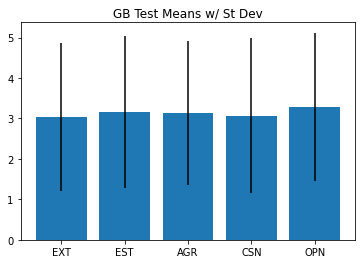

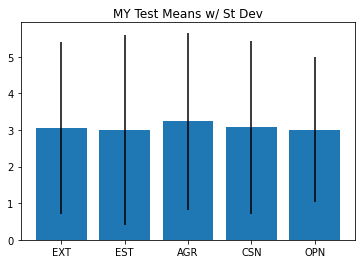

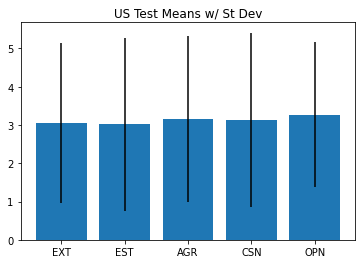

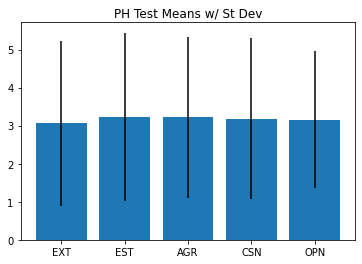

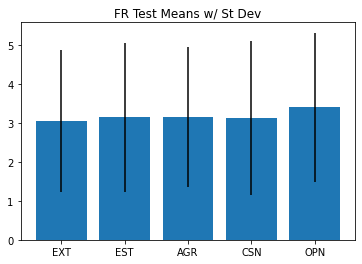

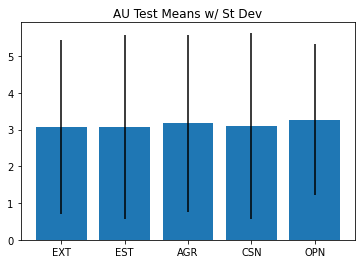

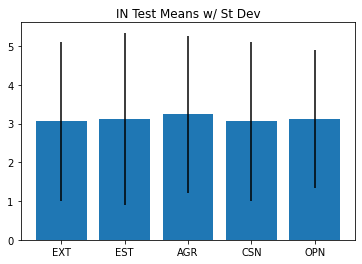

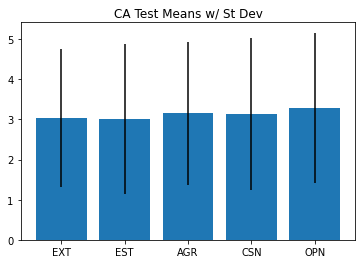

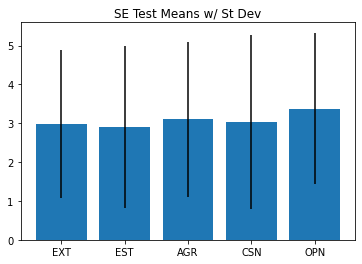

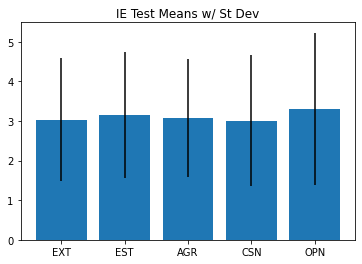

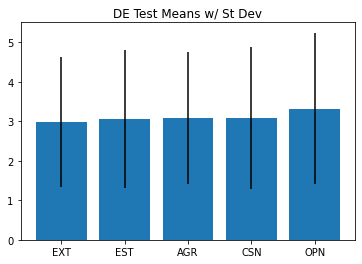

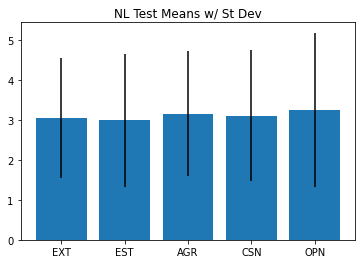

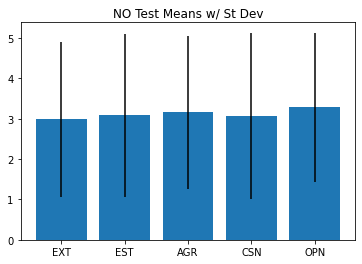

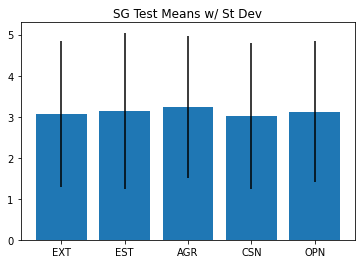

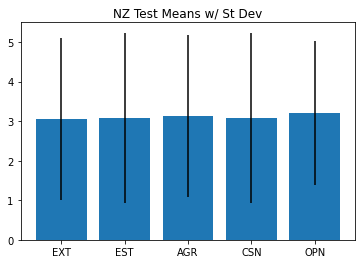

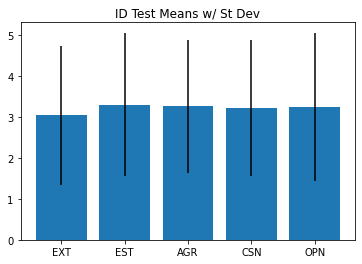

In [60]:
# Plot the averages for each country
labels = ['EXT','EST', 'AGR', 'CSN', 'OPN']

for i in range (len(coun_d)):
    if coun_d.at[i, "NumberOfEntries"] > 100:
        hites = [coun_d.at[i, "EXT_Mean"], 
                coun_d.at[i, "EST_Mean"], 
                coun_d.at[i, "AGR_Mean"], 
                coun_d.at[i, "CSN_Mean"], 
                coun_d.at[i, "OPN_Mean"]]
        error = [coun_d.at[i, "EXT_Std"], 
                coun_d.at[i, "EST_Std"],
                coun_d.at[i, "AGR_Std"],
                coun_d.at[i, "CSN_Std"],
                coun_d.at[i, "OPN_Std"]]
        plt.bar(labels, hites, yerr=error)
        plt.title(coun_d.at[i, "Country"] + ' Test Means w/ St Dev')
        plt.show()


In [ ]:
for i in range (len(coun_d)):
    if coun_d.at[i, "NumberOfEntries"] >= 100:
        print(coun_d.at[i, "Country"], " had ", coun_d.at[i, "Country"] , " responses")